<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Jhee/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 3.8 MB/s eta 0:00:00


In [3]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [4]:
#Select the frim for the prediction
firm = "NFLX"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [5]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Netflix, Inc.


# Data Collection

### Stock Price

In [6]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-18 00:00:00-05:00,379.299988,389.540009,379.190002,387.779999,5173900,0.0,0.0
2020-02-19 00:00:00-05:00,388.119995,392.950012,384.899994,386.190002,4896400,0.0,0.0
2020-02-20 00:00:00-05:00,386.559998,389.700012,376.679993,386.000000,4079400,0.0,0.0
2020-02-21 00:00:00-05:00,385.329987,387.320007,377.899994,380.070007,3930100,0.0,0.0
2020-02-24 00:00:00-05:00,364.760010,372.820007,361.000000,368.700012,6936400,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,1023.049988,1032.849976,1015.880005,1027.599976,3296600,0.0,0.0
2025-02-11 00:00:00-05:00,1020.789978,1022.690002,1002.950012,1008.080017,3331800,0.0,0.0
2025-02-12 00:00:00-05:00,1005.489990,1027.739990,998.349976,1027.310059,3389000,0.0,0.0


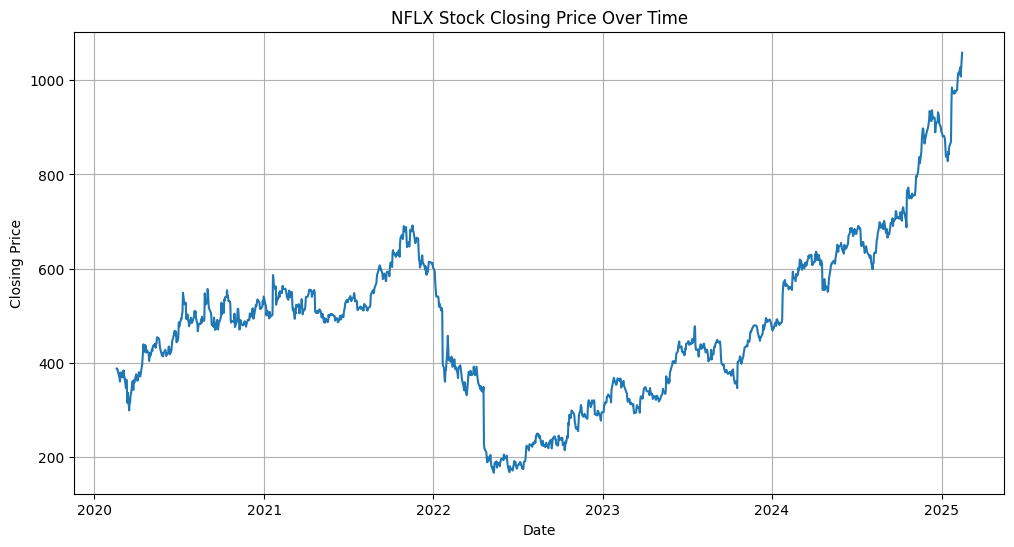

In [7]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [8]:
!pip install fredapi

In [9]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1294.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1499.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [10]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Amortization Cash Flow,Amortization Of Intangibles,Depreciation,Operating Gains Losses,Net Foreign Currency Exchange Gain Loss,Net Income From Continuing Operations
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,0.0,0.12,19044502000.0,5116228000.0,12438779000.0,17332683000.0,19044502000.0,6605723000.0,-354406000.0,765620000.0,...,199548000.0,199548000.0,12438779000.0,12438779000.0,12230367000.0,12230367000.0,208412000.0,-430661000.0,-430661000.0,5116228000.0
2022-12-31,0.0,0.15,20332955000.0,4491924000.0,14362814000.0,19168285000.0,20332955000.0,5970141000.0,-368902000.0,706212000.0,...,-166550000.0,-166550000.0,14362814000.0,14362814000.0,14026132000.0,14026132000.0,336682000.0,-353111000.0,-353111000.0,4491924000.0
2023-12-31,0.0,0.13,21508387000.0,5407990000.0,14554384000.0,19715368000.0,21508387000.0,6954003000.0,-748598000.0,748598000.0,...,-459359000.0,-459359000.0,14554384000.0,14554384000.0,14197437000.0,14197437000.0,356947000.0,176296000.0,176296000.0,5407990000.0
2024-12-31,0.0,0.13,26314821000.0,8711631000.0,15630431000.0,21038464000.0,26314821000.0,10684390000.0,-451957000.0,718733000.0,...,-590698000.0,-590698000.0,15630431000.0,15630431000.0,15301517000.0,15301517000.0,328914000.0,-121539000.0,-121539000.0,8711631000.0


In [11]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administration',
 'Selling And Marketing Expense',
 'General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

In [12]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [13]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,17 hours ago,Will Netflix and Amazon own all sports program...,"The Super Bowl is in the books, with the Phila..."
1,9 hours ago,Roku Stock on Pace for Best Day Since 2023. St...,Roku stock was soaring Friday after positive ...
2,yesterday,These 3 Companies Crushed Quarterly Expectatio...,"Throughout the Q4 reporting period, three comp..."
3,yesterday,My Dying Father Helped Me to See the Value of ...,Some of our last hours were spent watching an ...
4,yesterday,This fund surged 40% last year. The manager no...,T. Rowe Price’s Anthony Wang talks about what ...
5,yesterday,Think You Know Roku? Here's 1 Little-Known Fac...,Are you curious about Roku's secret to lasting...
6,2 days ago,Health Insurers Deny 850 Million Claims a Year...,Patients who contest denials face a daunting p...
7,2 days ago,2 Internet Stocks with All-Star Potential and ...,"By breaking down physical barriers, consumer i..."
8,2 days ago,"Streaming Slows, So Netflix (NFLX) Looks to Po...",Netflix eyes video podcasts as the next big co...
9,2 days ago,"Netflix, Inc. (NFLX): Jim Cramer Calls It “The...",We recently published a list of 17 Best Stocks...


02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

##### Reddit seb scrapping

In [21]:
import asyncpraw  # Reddit API Library
import asyncio  # Asynchronous execution
import nest_asyncio  # Prevent async loop errors
import datetime  # For date filtering
import re

nest_asyncio.apply()  # Preventing async loop errors

# Company to subreddit mapping
firm_subreddit_mapping = {
    "Apple": "apple",
    "Google": "google",
    "Tesla": "teslamotors",
    "Microsoft": "windows",
    "Amazon": "amazon",
    "Nvidia": "nvidia",
    "Meta": "facebook",
}

# Keywords for refining searches
firm_keywords = {
    "Apple": ["Apple Inc", "AAPL", "iPhone", "Macbook", "Tim Cook"],
    "Google": ["Google LLC", "GOOGL", "Alphabet", "Google AI", "Sundar Pichai"],
    "Tesla": ["Tesla Inc", "TSLA", "Elon Musk", "Tesla stock"],
    "Microsoft": ["Microsoft Corp", "MSFT", "Azure", "Satya Nadella"],
    "Amazon": ["Amazon.com", "AMZN", "AWS", "Jeff Bezos"],
    "Nvidia": ["Nvidia Corp", "NVDA", "GPU", "RTX 4090"],
    "Meta": ["Meta Platforms", "META", "Facebook stock", "Mark Zuckerberg"],
}

# Reddit API Function to Get a Year's Worth of Data
async def fetch_reddit_yearly(firm_name):
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    firm_key = firm_name.split(' ')[0]  # Extract first word of firm name
    subreddit_name = firm_subreddit_mapping.get(firm_key, "all")  # Use r/all if no specific subreddit exists
    keywords = firm_keywords.get(firm_key, [])

    try:
        subreddit = await reddit.subreddit(subreddit_name)
    except Exception as e:
        print(f"Error accessing subreddit: {e}")
        return pd.DataFrame()

    # Get timestamp for 1 year ago
    one_year_ago = int((datetime.datetime.utcnow() - datetime.timedelta(days=365)).timestamp())

    # Store data
    data = []
    after = None  # Pagination key

    # Fetch multiple pages of results
    while True:
        search_results = subreddit.search(
            query=f"{firm_key} OR {' OR '.join(keywords)}",
            sort="new",
            time_filter="year",
            limit=100
        )

        async for post in search_results:
            if post.created_utc < one_year_ago:
                break  # Stop if post is older than a year

            full_url = post.url.strip()
            if full_url.startswith("https://www.reddit.com/"):  # Ensure only valid Reddit posts
                data.append({
                    "Title": post.title,
                    "Score": post.score,
                    "URL": full_url,
                    "Date": datetime.datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d'),
                    "Content": post.selftext[:500]
                })

        # Pagination: Get the next batch of results
        after = getattr(search_results, "after", None)
        if not after:
            break  # Stop if there's no more data

    await reddit.close()
    df = pd.DataFrame(data)
    return df

# Execution
if __name__ == "__main__":
    firm_name = "amazon"  # Example firm
    df = asyncio.run(fetch_reddit_yearly(firm_name))  # Fetch all Apple-related posts for the year
    print(df)


                                                Title  Score  \
0       I did it! I landed an sde1 position at amazon      1   
1           Hoping someone can verify my parts picked      2   
2   Best gift for a 7-year-old boy that is below $...      1   
3   Won £5.50 from 3 free spins on William hill an...      1   
4   Kobo was founded, designed and developed in Ca...      3   
..                                                ...    ...   
77  Best projector for dim rooms within a given bu...      3   
78          It’s another Amazon case find for the RP5     17   
79            Incorrectly pierced? Or just irritated?      0   
80            SavorOne vs AAA Daily Advantage for me?      0   
81                       building a custom lightsaber      1   

                                                  URL        Date  \
0   https://www.reddit.com/r/leetcode/comments/1ip...  2025-02-15   
1   https://www.reddit.com/r/buildapc/comments/1ip...  2025-02-15   
2   https://www.reddit.c

02.10 Ri-on: Added draft for web scrapping reddit posts

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation